In [54]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns

# Exploration des données


In [2]:
df=pd.read_csv("../data/mxmh_survey_results.csv")
print(df)

               Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes      

## Affichage des données

In [3]:
total_lignes = df.shape[0]
print(f"Total de lignes : {total_lignes}")

Total de lignes : 736


In [4]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [5]:
print("columns :")
print(df.dtypes)

columns :
Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]               

In [14]:
valeurs_uniques = {col: df[col].unique().tolist() for col in df.columns}

# Afficher les résultats
for colonne, valeurs in valeurs_uniques.items():
    print(f"Colonne: {colonne}")
    print(f"Valeurs uniques: {valeurs}")
    print()

Colonne: Timestamp
Valeurs uniques: ['8/27/2022 19:29:02', '8/27/2022 19:57:31', '8/27/2022 21:28:18', '8/27/2022 21:40:40', '8/27/2022 21:54:47', '8/27/2022 21:56:50', '8/27/2022 22:00:29', '8/27/2022 22:18:59', '8/27/2022 22:33:05', '8/27/2022 22:44:03', '8/27/2022 22:51:15', '8/27/2022 23:00:32', '8/27/2022 23:04:00', '8/27/2022 23:12:03', '8/27/2022 23:16:06', '8/27/2022 23:19:52', '8/27/2022 23:39:41', '8/27/2022 23:39:49', '8/27/2022 23:40:55', '8/27/2022 23:41:36', '8/27/2022 23:43:06', '8/28/2022 0:28:02', '8/28/2022 1:39:02', '8/28/2022 3:19:08', '8/28/2022 4:13:11', '8/28/2022 4:38:14', '8/28/2022 4:40:36', '8/28/2022 5:05:51', '8/28/2022 5:16:30', '8/28/2022 8:36:27', '8/28/2022 10:30:22', '8/28/2022 10:38:05', '8/28/2022 10:54:30', '8/28/2022 10:59:53', '8/28/2022 11:08:51', '8/28/2022 11:13:25', '8/28/2022 11:25:49', '8/28/2022 11:27:15', '8/28/2022 11:36:35', '8/28/2022 11:39:21', '8/28/2022 11:50:31', '8/28/2022 11:54:45', '8/28/2022 11:55:54', '8/28/2022 11:58:48', '8/2

In [15]:
nb_nan = df.isna().sum()

# Afficher les résultats
print(nb_nan)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [55]:

df_frequency = df.loc[:, df.columns.str.startswith('Frequency')]
dict_frequency={'Never':0, 'Rarely':1, 'Sometimes':2, 'Very frequently':3}

#print(df_frequency)
df_numeric = df_frequency.replace(dict_frequency)


df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
# Calculer le score total pour chaque genre
genre_scores = df_numeric.sum()
# Trier les genres par score décroissant
top_genres = genre_scores.sort_values(ascending=False)

print(top_genres)

Frequency [Rock]                1524
Frequency [Pop]                 1495
Frequency [Hip hop]             1019
Frequency [Classical]            983
Frequency [Rap]                  983
Frequency [R&B]                  927
Frequency [Video game music]     920
Frequency [Metal]                898
Frequency [Lofi]                 786
Frequency [Jazz]                 756
Frequency [EDM]                  753
Frequency [Folk]                 745
Frequency [Country]              602
Frequency [K pop]                541
Frequency [Latin]                447
Frequency [Gospel]               281
dtype: int64


C:\Users\quentin.ferrer\AppData\Local\Temp\ipykernel_6468\1980386575.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## Exploration histogramme

In [6]:
print("Histogramme de l'âge des participants : ")
fig = px.histogram(df, x='Age', title="Histogramme de l'âge")
fig.show()

Histogramme de l'âge des participants : 


In [7]:
print("Histogramme de l'heures d'écoute par jours des participants : ")
fig = px.histogram(df, x='Hours per day', title="Histogramme de l'heure d'écoute quotidienne")
fig.show()

Histogramme de l'heures d'écoute par jours des participants : 


## Préparation des données

In [47]:
dict_bool={'Yes':1, 'No':0}
dict_genre={'Latin':0, 'Rock':1, 'Video game music':2, 'Jazz':3, 'R&B':4, 'K pop':5, 'Country':6, 'EDM':7, 'Hip hop':8, 'Pop':9, 'Rap':10, 'Classical':11, 'Metal':12, 'Folk':13, 'Lofi':14, 'Gospel':15}
dict_frequency={'Never':0, 'Rarely':1, 'Sometimes':2, 'Very frequently':3}
dict_effect={'Worsen':-1,'No effect':0, 'Improve':1}
dict_streaming={'I do not use a streaming service.':0, 'Apple Music':1,'Spotify':2, 'Pandora':3, 'YouTube Music':4,  'Other streaming service':5 }

dict_replace_col={'Primary streaming service':dict_streaming,'While working':dict_bool,'Instrumentalist':dict_bool,'Composer':dict_bool,'Fav genre':dict_genre,
                  'Exploratory':dict_bool,'Foreign languages':dict_bool,'Music effects':dict_effect}

In [48]:
def clean_data(df):
    print("__________________")
    print("Drop col : BPM")
    df = df.drop(columns=['BPM'])
    print("__________________")
    print("Drop NaN")
    print(f"Total rows : {df.shape[0]}")
    df = df.dropna()
    print(f"Total rows after drop na : {df.shape[0]}")
    print("__________________")
    print("Replace str by float in each columns")
    for col in df.columns :
        print(col)
        print(dict_replace_col.keys())
        if col in dict_replace_col.keys():
            print("in")
            df[col]=df[col].map(dict_replace_col[col])
        elif col.startswith('Frequency'):

            print(df[col])
            df[col]=df[col].map(dict_frequency)
    return df



In [51]:
df_clean=clean_data(df)
df_clean

__________________
Drop col : BPM
__________________
Drop NaN
Total rows : 736
Total rows after drop na : 718
__________________
Replace str by float in each columns
Timestamp
dict_keys(['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music effects'])
Age
dict_keys(['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music effects'])
Primary streaming service
dict_keys(['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music effects'])
in
Hours per day
dict_keys(['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music effects'])
While working
dict_keys(['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Music

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,2,4.0,0,0,0,2,0,1,...,0,1,1,3,7.0,7.0,10.0,2.0,0,I understand.
3,8/27/2022 21:40:40,61.0,4,2.5,1,0,1,3,1,1,...,2,0,0,0,9.0,7.0,3.0,3.0,1,I understand.
4,8/27/2022 21:54:47,18.0,2,4.0,1,0,0,4,1,0,...,3,3,0,1,7.0,2.0,5.0,9.0,1,I understand.
5,8/27/2022 21:56:50,18.0,2,5.0,1,1,1,3,1,1,...,3,3,3,0,8.0,8.0,7.0,7.0,1,I understand.
6,8/27/2022 22:00:29,18.0,4,3.0,1,1,0,2,1,1,...,1,0,0,2,4.0,8.0,6.0,0.0,1,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,2,2.0,1,1,0,1,1,1,...,0,1,3,0,7.0,6.0,0.0,9.0,1,I understand.
732,11/1/2022 22:26:42,18.0,2,1.0,1,1,0,9,1,1,...,0,0,2,2,3.0,2.0,2.0,5.0,1,I understand.
733,11/3/2022 23:24:38,19.0,5,6.0,1,0,1,10,1,0,...,2,2,1,1,2.0,2.0,2.0,2.0,1,I understand.
734,11/4/2022 17:31:47,19.0,2,5.0,1,1,0,11,0,0,...,0,0,0,2,2.0,3.0,2.0,1.0,1,I understand.


## Clustering

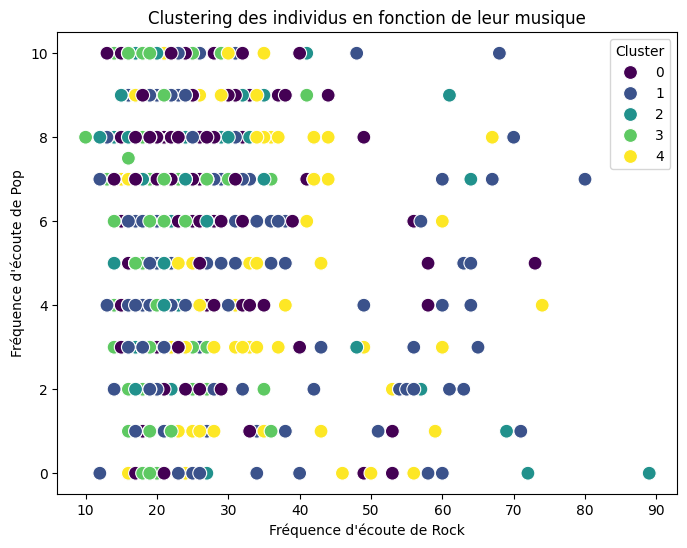

In [61]:
df_clustering = df_clean.drop(columns=['Timestamp','Anxiety', 'Depression', 'Insomnia','OCD','Permissions'])
df_result_cluster=df_clean.copy()
#Scale data
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)


kmeans = KMeans(n_clusters=5)
df_result_cluster['Kmeans_5'] = kmeans.fit_predict(df_clustering_scaled)
kmeans = KMeans(n_clusters=6)
df_result_cluster['Kmeans_6'] = kmeans.fit_predict(df_clustering_scaled)
kmeans = KMeans(n_clusters=7)
df_result_cluster['Kmeans_7'] = kmeans.fit_predict(df_clustering_scaled)
kmeans = KMeans(n_clusters=8)
df_result_cluster['Kmeans_8'] = kmeans.fit_predict(df_clustering_scaled)
dbscan=DBSCAN(min_samples=5)
df_result_cluster['dbscan_ms5'] = dbscan.fit_predict(df_clustering_scaled)
dbscan=DBSCAN(eps=0.8,min_samples=5)
df_result_cluster['dbscan_ms5_eps08'] = dbscan.fit_predict(df_clustering_scaled)

# 4. Visualiser les résultats (optionnel, selon les dimensions des données)
# Exemple avec deux colonnes pour la visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_result_cluster['Age'], y=df_result_cluster['Anxiety'], hue=df_result_cluster['Kmeans_5'], palette='viridis', s=100)
plt.title('Clustering des individus en fonction de leur musique')
plt.xlabel('Fréquence d\'écoute de Rock')
plt.ylabel('Fréquence d\'écoute de Pop')
plt.legend(title='Cluster')
plt.show()

In [65]:
df_result_cluster.to_csv('../output/df_result_cluster.csv', index=False)

## Explicabilité

In [64]:
list_name_cluster=['Kmeans_5','Kmeans_6','Kmeans_7','Kmeans_8','dbscan_ms5','dbscan_ms5_eps08']
df_stat_cluster=df_result_cluster.drop(columns=['Timestamp','Permissions'])
for name_cluster in list_name_cluster:
    
    min = df_stat_cluster.groupby(name_cluster).min()
    mean = df_stat_cluster.groupby(name_cluster).mean()
    max = df_stat_cluster.groupby(name_cluster).max()
    med = df_stat_cluster.groupby(name_cluster).median()
    std = df_stat_cluster.groupby(name_cluster).std()
    print('___________________________________________________________________')
    print(f"Caractéristiques pour le cluster : {name_cluster}")
    print(f"Min : {min}")
    print(f"Médiane : {med}")
    print(f"Moyenne : {mean}")
    print(f"Max : {max}")
    print(f"STD : {std}")

___________________________________________________________________
Caractéristiques pour le cluster : Kmeans_5
Min :            Age  Primary streaming service  Hours per day  While working  \
Kmeans_5                                                                  
0         13.0                          0            1.0              0   
1         12.0                          0            0.1              0   
2         12.0                          0            1.0              0   
3         10.0                          0            0.0              0   
4         15.0                          0            0.0              0   

          Instrumentalist  Composer  Fav genre  Exploratory  \
Kmeans_5                                                      
0                       0         0          0            0   
1                       0         0          1            0   
2                       0         0          1            0   
3                       0         0      